In [1]:
#한글 폰트 사용 : colab , 런타임 다시 시작 하기
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [4]:
from urllib.request import urlopen
from urllib import parse

import json 

In [5]:
def adamsAi(iTxt,  myType) :
  mykey='4722875241399063807'
  myquery=parse.quote(iTxt)

  url = 'http://api.adams.ai/datamixiApi/omAnalysis?key='+ mykey
  url =  url +'&query='+myquery
  url =  url +'&type='+ myType
  print(url)

  dt = urlopen(url).read().decode('utf-8')
  dt = json.loads(dt)

  if myType == '0' :
    score = dt['return_object']['score']
    label =  dt['return_object']['label']

  else :
    score = dt['return_object']['Result'][0][0]
    label = dt['return_object']['Result'][0][1]

  return score, label

In [6]:
rt = { '부정' : 0, '중립' :  0 , '긍정' : 0} # 감성분석만

with open('/content/drive/My Drive/Colab Notebooks/PythonWork/PythonBasic/work/Day04/평점.txt', 'r', encoding ='utf-8') as fp:
  data = fp.readlines()

for line in data :
  line = line.replace("\n", "")
  item = line.split("\t")
  score, label = adamsAi(item[1], '0' )# 감성분석만
  rt[label] = rt[label] +1
  print(item[1], '>>', label)
  print(rt)

http://api.adams.ai/datamixiApi/omAnalysis?key=4722875241399063807&query=%EB%B0%95%EC%84%B1%EC%9B%85%EC%9D%B4%20%EC%A0%9C%EC%9D%BC%20%EC%9E%98%ED%96%88%EB%8A%94%EB%93%AF%20%E3%85%8B%20%EC%8B%A0%EA%B3%A0&type=0
박성웅이 제일 잘했는듯 ㅋ 신고 >> 긍정
{'부정': 0, '중립': 0, '긍정': 1}
http://api.adams.ai/datamixiApi/omAnalysis?key=4722875241399063807&query=%EB%B0%95%EC%84%B1%EC%9B%85%EC%9D%98%EC%B0%A8%EB%B6%84%ED%95%9C%EB%B0%9C%EC%84%B1%EB%84%98%EB%82%98%EB%A9%8B%EC%9E%88%EC%9D%8C%3F%20&type=0
박성웅의차분한발성넘나멋있음?  >> 긍정
{'부정': 0, '중립': 0, '긍정': 2}
http://api.adams.ai/datamixiApi/omAnalysis?key=4722875241399063807&query=%EC%84%9C%EC%A7%80%EB%8F%84%20%EC%95%8A%EB%8A%94%20%EC%95%84%EC%9E%AC%EB%93%A4%EC%9D%B4%EB%9E%91%20%ED%98%84%ED%95%99%EC%A0%81%20%ED%97%88%EC%84%B8%EB%A1%9C%20%EA%B0%80%EB%93%9D%ED%95%9C%20%ED%8F%89%EB%A1%A0%EA%B0%80%EB%9E%91%20%EB%84%A4%EC%9D%B4%EB%B2%84%20%EB%B0%A9%EA%B5%AC%EC%84%9D%20%EC%B2%A0%ED%95%99%EC%9E%90%EB%93%A4%EC%9D%B4%20%EB%B9%A8%EC%95%84%EC%84%9C%20%EB%8B%B3%EC%95%84%EB%B2%84%EB%A6%B

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

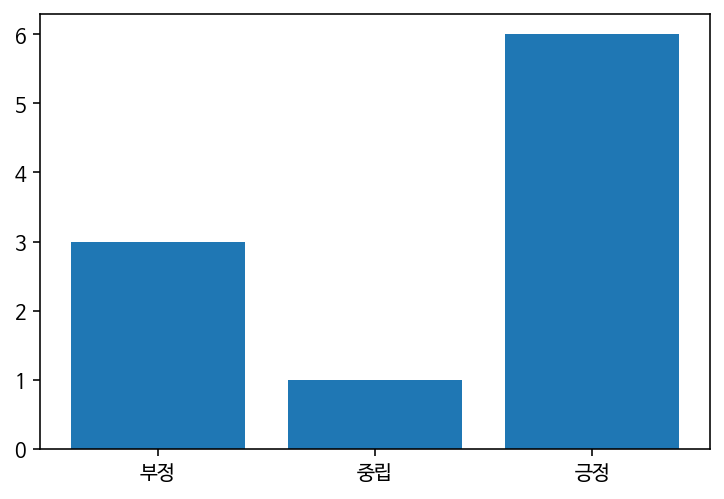

In [23]:
# plt.plot(rt.keys()), list(rt.values()))
# plt.show()

plt.bar(list(rt.keys()), list(rt.values()))
plt.show()

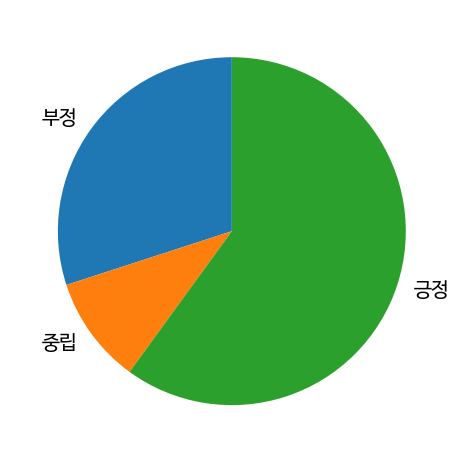

In [21]:
plt.pie( list(rt.values()), labels= list(rt.keys()), startangle=90)
plt.show()

